In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
encoding_dim = 200
encoding_dim_2 = 45
image_length = 784

In [18]:
# Import and convert data to percentage points
x_train = pd.read_csv("data/mnist_train.csv", header = None)
y_train = x_train.loc[:, 0].to_numpy()
x_train = x_train.loc[:, 1:].to_numpy()
x_train = x_train.astype('float32') / 255.

x_test = pd.read_csv("data/mnist_test.csv", header = None)
y_test = x_test.loc[:, 0].to_numpy()
x_test = x_test.loc[:, 1:].to_numpy()
x_test = x_test.astype('float32') / 255.

# Take sample
x_validation = x_train[5000:10000, :]
x_train_input = x_train[10000:, :]
x_train = x_train[:5000, :]

In [17]:
x_validation.shape

(0, 784)

In [19]:
input_img = Input(shape = (image_length,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim_2, activation='relu')(encoded)

decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(image_length, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(x_validation, x_validation))

predictions = autoencoder.predict(x_train_input)

Train on 5000 samples, validate on 5000 samples
Epoch 1/20
5000/5000 [==============================] - 3s 575us/step - loss: 0.2576 - acc: 0.7849 - val_loss: 0.1818 - val_acc: 0.7978
Epoch 2/20
5000/5000 [==============================] - 2s 308us/step - loss: 0.1592 - acc: 0.8039 - val_loss: 0.1460 - val_acc: 0.8049
Epoch 3/20
5000/5000 [==============================] - 2s 301us/step - loss: 0.1343 - acc: 0.8086 - val_loss: 0.1294 - val_acc: 0.8087
Epoch 4/20
5000/5000 [==============================] - 2s 307us/step - loss: 0.1210 - acc: 0.8107 - val_loss: 0.1186 - val_acc: 0.8099
Epoch 5/20
5000/5000 [==============================] - 2s 309us/step - loss: 0.1134 - acc: 0.8118 - val_loss: 0.1127 - val_acc: 0.8102
Epoch 6/20
5000/5000 [==============================] - 2s 315us/step - loss: 0.1077 - acc: 0.8125 - val_loss: 0.1081 - val_acc: 0.8110
Epoch 7/20
5000/5000 [==============================] - 2s 339us/step - loss: 0.1034 - acc: 0.8130 - val_loss: 0.1055 - val_acc: 0.8110


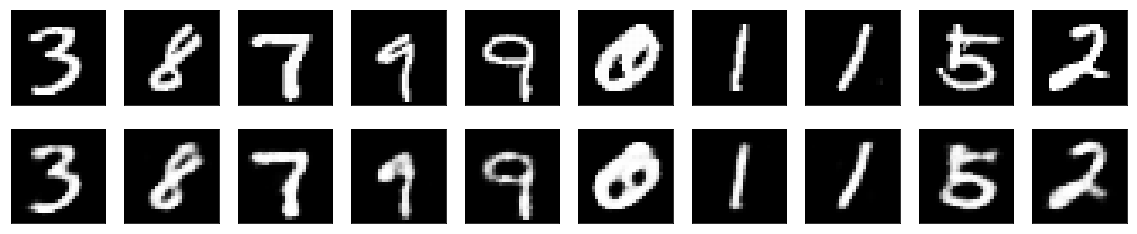

In [22]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(2*n, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_input[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
predictions.shape

(50000, 784)

In [25]:
np.savetxt("data/output_neural_net.csv", predictions, delimiter=",")